# Project name: PY sales optimizer

# Step 1 - data audit & data visualisation 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import statsmodels.api
import statsmodels.formula.api as smf
from scipy import stats

df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pakistan Largest Ecommerce Dataset.csv");

## Data Audit per single variable
**0 General**

In [ ]:
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

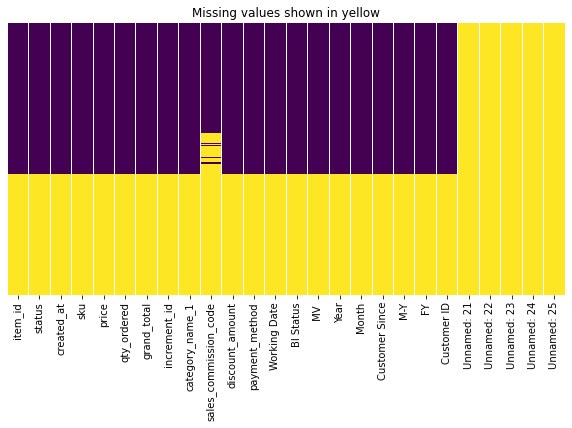

In [ ]:
df.info()

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("Missing values shown in yellow");

In [ ]:
df[df.duplicated()==True].index

Int64Index([ 584525,  584526,  584527,  584528,  584529,  584530,  584531,
             584532,  584533,  584534,
            ...
            1048565, 1048566, 1048567, 1048568, 1048569, 1048570, 1048571,
            1048572, 1048573, 1048574],
           dtype='int64', length=464050)


Observations

*   The dataset includes 26 columns and 1.048.574 rows
*   Empty rows from row 584.525 onwards
*   Columns "Unnamed 21 to 25" without values
*   Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have "mixed types"
*   Only sales_commission_code with significant number of "nan"

**1. drop/fill rows & columns that contain missing values**

In [3]:
df.dropna(axis=0,how='all',inplace=True)
df.dropna(axis=1,how='all',inplace=True)

print(df.columns, '\n')
print(df.shape)

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID'],
      dtype='object') 

(584524, 21)


In [ ]:
df.isnull().sum()

item_id                       0
status                       15
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1             164
sales_commission_code    137175
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
 MV                           0
Year                          0
Month                         0
Customer Since               11
M-Y                           0
FY                            0
Customer ID                  11
dtype: int64

**2 item_id**

In [4]:
df["item_id"].duplicated().sum()

0

**3 Customer ID & increment_id**



In [5]:
df.dropna(axis=0,how='any',inplace=True, subset=['Customer ID'])

In [6]:
print(df["Customer ID"].duplicated().sum())
df[df["Customer ID"].duplicated()==True].sort_values(["Customer ID", "sku"])

469187


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
91500,324257.0,canceled,11/25/2016,RS_Habshi Halwa Tin,270.0,1.0,270.0,100222998,Soghaat,\N,0.0,jazzvoucher,11/25/2016,Gross,270,2016.0,11.0,2016-7,11-2016,FY17,2.0
210137,473370.0,complete,5/19/2017,ALHAMRA_US-0961-K,299.0,1.0,1245.0,100306394,Men's Fashion,\N,0.0,cod,5/19/2017,Net,299,2017.0,5.0,2016-7,5-2017,FY17,3.0
210139,473372.0,complete,5/19/2017,BD_BIG DEAL_16,350.0,1.0,1245.0,100306394,Mobiles & Tablets,\N,0.0,cod,5/19/2017,Net,350,2017.0,5.0,2016-7,5-2017,FY17,3.0
210136,473369.0,complete,5/19/2017,BT_BT-422,530.0,1.0,1245.0,100306394,Men's Fashion,\N,0.0,cod,5/19/2017,Net,530,2017.0,5.0,2016-7,5-2017,FY17,3.0
210138,473371.0,complete,5/19/2017,e-seller_7,66.0,1.0,1245.0,100306394,Mobiles & Tablets,\N,0.0,cod,5/19/2017,Net,66,2017.0,5.0,2016-7,5-2017,FY17,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584477,905157.0,canceled,8/28/2018,MATQMO5AF2A12CB3C66,8700.0,1.0,8950.0,100562349,Mobiles & Tablets,NaN,0.0,bankalfalah,8/28/2018,Gross,"8,700",2018.0,8.0,2018-8,8-2018,FY19,115319.0
584479,905159.0,canceled,8/28/2018,WOFMAR5A3A1045C9D30,748.5,1.0,1747.5,100562350,Women's Fashion,NaN,0.0,bankalfalah,8/28/2018,Gross,749,2018.0,8.0,2018-8,8-2018,FY19,115320.0
584519,905204.0,cod,8/28/2018,WOFSCE5AE00357AECDE,699.0,1.0,849.0,100562385,Women's Fashion,NaN,0.0,cod,8/28/2018,Valid,699,2018.0,8.0,2018-8,8-2018,FY19,115320.0
584496,905177.0,processing,8/28/2018,MEFMOV5AD9155B0C0DC-M,1048.0,1.0,1298.0,100562364,Men's Fashion,NaN,0.0,cod,8/28/2018,Gross,"1,048",2018.0,8.0,2018-8,8-2018,FY19,115322.0


In [7]:
df[df['Customer ID'] == 12]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
14,211146.0,complete,7/1/2016,kcc_glamour deal,320.0,1.0,0.0,100147456,Beauty & Grooming,\N,0.0,customercredit,7/1/2016,Net,320,2016.0,7.0,2016-7,7-2016,FY17,12.0
63146,289770.0,complete,11/19/2016,AKL_A131135353-FW-56-Green,2600.0,1.0,2600.0,100200628,Women's Fashion,\N,0.0,cod,11/19/2016,Net,"2,600",2016.0,11.0,2016-7,11-2016,FY17,12.0
63282,289938.0,complete,11/19/2016,Trzw_DUP-CHF-005-016-Black,1183.0,1.0,1183.0,100200717,Women's Fashion,\N,0.0,cod,11/19/2016,Net,"1,183",2016.0,11.0,2016-7,11-2016,FY17,12.0


In [8]:
df[df['Customer ID'] == 115320.0]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
584478,905158.0,canceled,8/28/2018,WOFNET59AD3085289FE,749.0,1.0,1747.5,100562350,Women's Fashion,NaN,0.0,bankalfalah,8/28/2018,Gross,749,2018.0,8.0,2018-8,8-2018,FY19,115320.0
584479,905159.0,canceled,8/28/2018,WOFMAR5A3A1045C9D30,748.5,1.0,1747.5,100562350,Women's Fashion,NaN,0.0,bankalfalah,8/28/2018,Gross,749,2018.0,8.0,2018-8,8-2018,FY19,115320.0
584519,905204.0,cod,8/28/2018,WOFSCE5AE00357AECDE,699.0,1.0,849.0,100562385,Women's Fashion,NaN,0.0,cod,8/28/2018,Valid,699,2018.0,8.0,2018-8,8-2018,FY19,115320.0


In [9]:
df[df['increment_id'] == '100562387']

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
584521,905206.0,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,0.0,bankalfalah,8/28/2018,Gross,"259,998",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584522,905207.0,processing,8/28/2018,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,0.0,bankalfalah,8/28/2018,Gross,"174,600",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584523,905208.0,processing,8/28/2018,MATSAM5B10F91A9B6AB,108640.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,0.0,bankalfalah,8/28/2018,Gross,"217,280",2018.0,8.0,2018-7,8-2018,FY19,113474.0


Observation
*   Drop 11 rows with missing values in customer id;
*   Same customer id can have multiple purchases, recorded by 'increment_id';
*   Each increment_id can have multiple lines with different products ordered in the same time recorded by 'item_id';
*   There is no duplicates by item id: per customer per order per item;

In [10]:
print(df["Customer ID"].value_counts().describe(), "\n")
print("Customers with only 1 purchased %:",(df["Customer ID"].value_counts().values==1).sum()/len(np.unique(df["Customer ID"]))*100, '\n')

print("Only consider transactions with 'complete'. \n")
test = df[df['status'] == 'complete']
print(test["Customer ID"].value_counts().describe(), "\n")
print("Customers with only 1 purchased %:",(test["Customer ID"].value_counts().values==1).sum()/len(np.unique(test["Customer ID"]))*100, '\n')

count    115326.000000
mean          5.068354
std          23.073603
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        2524.000000
Name: Customer ID, dtype: float64 

Customers with only 1 purchased %: 43.70133361080762 

Only consider transactions with 'complete'. 

count    67094.000000
mean         3.482949
std         16.819222
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       1657.000000
Name: Customer ID, dtype: float64 

Customers with only 1 purchased %: 52.77819179062211 



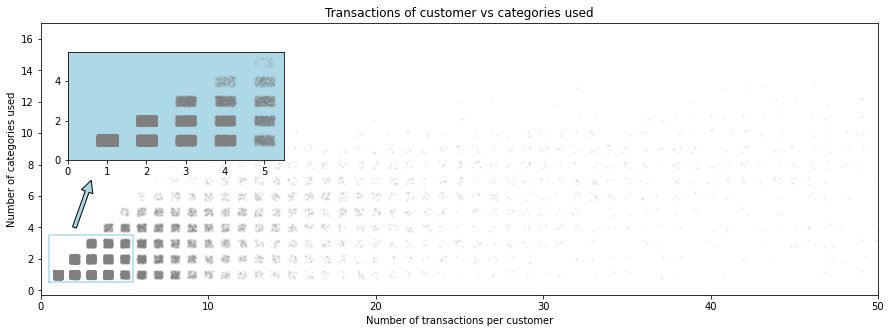

In [ ]:
def funk (x):
  u=len(np.unique(x))
  return u
a=test.groupby("Customer ID").agg({"category_name_1":funk})
x=len(a["category_name_1"][a["category_name_1"]==1])
x/len(a)

def func (x):
  return len(np.unique(x))
test=df[df["status"]=="complete"]

a=test.groupby("Customer ID").agg({"item_id" : "count", "category_name_1":func})
v=np.arange(-0.25,0.25,0.001)
w=np.arange(-0.25,0.25,0.001)
b=np.random.choice(v,len(a))
e=np.random.choice(w,len(a))
c=a["category_name_1"]+b
d=a["item_id"]+e

plt.figure(figsize=(15,5))
plt.scatter(d,c,s=2,alpha=0.1,marker="*",color="grey")
plt.annotate("",xy=(3,7),xytext=(2,4),arrowprops={"facecolor":"lightblue"})
plt.xlim([0,50])
plt.xlabel("Number of transactions per customer")
plt.ylabel("Number of categories used")
plt.title("Transactions of customer vs categories used")
plt.plot([0.5,0.5,5.5,5.5,0.5],[0.5,3.5,3.5,0.5,0.5],"lightblue")
plt.axes([0.15,0.5,0.2,0.3],facecolor="lightblue")
plt.scatter(d,c,s=2,alpha=0.1,marker="*",color="grey")
plt.xlim([0,5.5])
plt.ylim([0,5.5]);

Observations

*   More that 110k individual customers
*   44% with only one transaction
*   The median number of times purchased was 2.
*   Some outliers purchasesd more than 2000 times.

*   Considering "complete" orderings, 53% with only one complete order
*   74% of customers (related to "complete" orderings) buy from 1 category 

**4 status & BI Status**

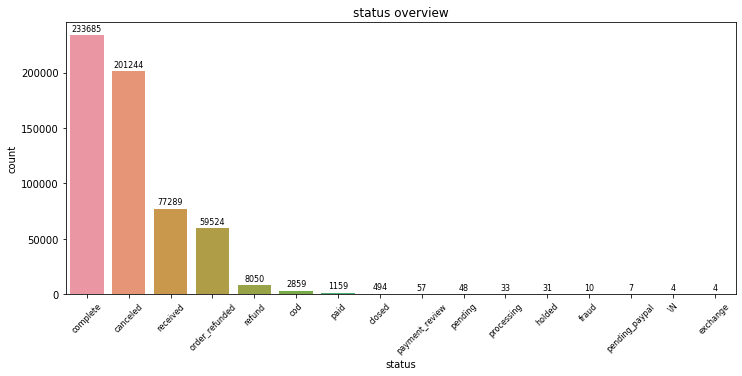

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,5))
graph=sns.countplot(ax=ax1, x=df["status"], order=df['status'].value_counts(ascending=False).index)
plt.xticks(fontsize=8,rotation=45)
plt.title("status overview");
for p in graph.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., height + 4000,height,ha="center",fontsize=8)

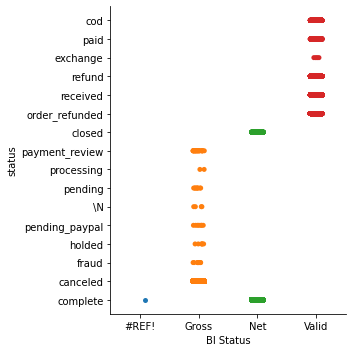

In [ ]:
sns.catplot(x="BI Status",y="status",data=df.dropna(axis=0,how="any"));

In [11]:
df = df[df['BI Status'] != '#REF!']

In [12]:
df.status.fillna('\\N',inplace=True)        

df['BIstatus_num'] = df['BI Status']
df['BIstatus_num'] = df['BIstatus_num'].replace(['Net'], 1)
df['BIstatus_num'] = df['BIstatus_num'].replace(['Valid'], 0)
df['BIstatus_num'] = df['BIstatus_num'].replace(['Gross'], -1)

df['status_new'] = df['status']
df['status_new'] = df['status_new'].replace(['order_refunded', 'refund'],'refunded')
df['status_new'] = df['status_new'].replace(['received','cod','complete', 'closed','exchange'],'completed')
df['status_new'] = df['status_new'].replace(['paid'],'processing')
df['status_new'] = df['status_new'].replace(['holded','pending_paypal','payment_review'],'pending')

print(df.status_new.value_counts(), '\n')

print(df.BIstatus_num.value_counts())

completed     314330
canceled      201244
refunded       67574
processing      1192
pending          143
\N                19
fraud             10
Name: status_new, dtype: int64 

 1    234178
-1    201449
 0    148885
Name: BIstatus_num, dtype: int64


Observations
*   Modalities "complete" and "canceled" dominate 
*   Some modalities seem to have equivalent meaning then re-group 'status', called 'status_new'
*   Missing values for 'status' default to '\N';
*   Variable with 3 modalities: Gross(40%), Net(34%), Valid(25%) 
*   Related to variable "status" (grouping)
*   Drop 1 observation with '#REF'
*   Translate 'BI Status' into numeric 'BIstatus_num' into numbers with only 3 levels.

**5 Customer Since**

In [13]:
print(df["Customer Since"].value_counts())
df['Customer Since new']=pd.to_datetime(df['Customer Since']).dt.strftime('%Y%m').astype('int')

2016-11    82714
2017-11    70785
2016-7     57068
2016-9     46746
2017-5     35356
2018-3     32052
2018-2     23989
2016-8     21051
2017-8     19088
2017-3     18234
2016-10    17546
2017-4     16826
2018-5     16076
2017-6     15593
2017-10    14618
2017-7     14035
2017-1     12260
2016-12    10638
2017-2     10293
2018-1      9665
2017-12     8667
2018-4      7626
2017-9      7442
2018-6      6798
2018-7      5330
2018-8      4016
Name: Customer Since, dtype: int64


Observations
*   Data started from 2016 07 and end by 2018 08.
*   Each increment_id has only one status (lastest transaction);

**5 created_at & work**

0


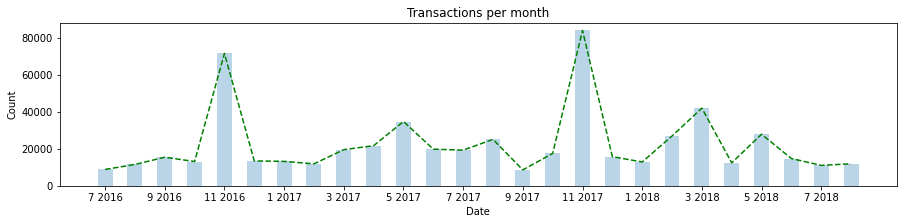

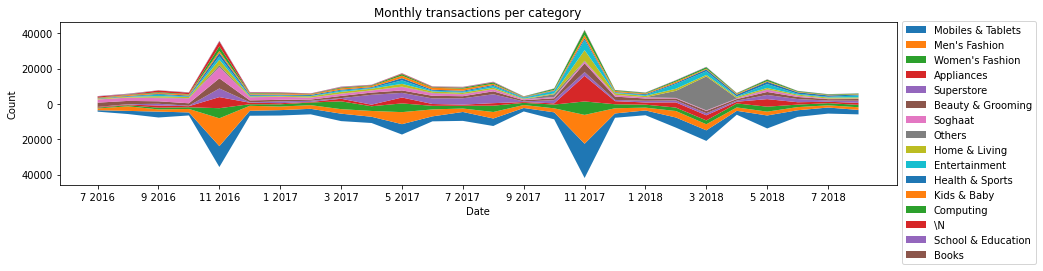

In [ ]:
print(sum(df.created_at!=df['Working Date'])) 

def get_month (date):
  return date.split("/")[0]
month=df["created_at"].apply(get_month)

def get_year (date):
  return date.split("/")[2]
year=df["created_at"].apply(get_year)

m_y_= month+" "+year
m_y_.value_counts()

w=[8837,11535,15433,13124,71528,13452,
   13195,11861,19534,21678,34736,19793,19275,25083,8591,17499,83928,15747,
   12872,26916,41955,12413,27867,14737,11039,11896]
x=['7 2016','9 2016', '11 2016',
   '1 2017', '3 2017', '5 2017','7 2017','9 2017', '11 2017',
    '1 2018','3 2018', '5 2018', '7 2018']

x1=['7-2016', '8-2016','9-2016', '10-2016', '11-2016', '12-2016',
   '1-2017', '2-2017', '3-2017','4-2017', '5-2017', '6-2017', '7-2017', '8-2017', '9-2017', '10-2017', '11-2017', '12-2017',
   '1-2018','2-2018', '3-2018', '4-2018', '5-2018', '6-2018', '7-2018', '8-2018']

v=df["category_name_1"].value_counts().index

mat=np.zeros(shape=(16,26))

for date,j in zip(x1,range(len(x1))):
  for name,i in zip(v,range(len(v))):
    mat[i,j]=len(df[(df["category_name_1"]==name)&(df["M-Y"]==date)])


plt.figure(figsize=(15,3))
plt.bar(range(0,26),w,width=0.5,alpha=0.3)
plt.plot(range(0,26),w,"g--")
plt.xticks(range(0,26,2),x)
plt.title("Transactions per month")
plt.xlabel("Date")
plt.ylabel("Count")

fig, ax = plt.subplots(figsize=(15, 3))
ax.stackplot(x1, mat,baseline="sym")
plt.xticks(range(0,26,2),x)
plt.title("Monthly transactions per category")
plt.yticks([-40000,-20000,0,20000,40000],[40000,20000,0,20000,40000]);
plt.legend(v,bbox_to_anchor=(1,1.04), loc="upper left")
plt.xlabel("Date")
plt.ylabel("Count");


Observations
*   Column 'Working Date' is identical to 'created_at', drop 'Working Date'
*   High peaks in November
*   Product categories show seasonality

**6 sku**

In [14]:
df["sku"].value_counts()

MATSAM59DB75ADB2F80                   3775
Al Muhafiz Sohan Halwa Almond         2258
emart_00-7                            2027
kcc_krone deal                        1894
infinix_Zero 4-Grey                   1793
                                      ... 
MEFFAS5AD68E6E7C34E-S                    1
fashion cafe_Tight-Cotton-Royal-32       1
HASGAD5A4B7B3941C21                      1
GBHII_GL509-BLACK-BLACK-12               1
LS_6003770000632                         1
Name: sku, Length: 84888, dtype: int64

Observations
*   No strongly dominant
*   According to point 2 tables, 'sku' is either a product name or sellers' name.






**7 Numeric variables**

In [15]:
df.loc[:,('price', 'qty_ordered', 'grand_total', 'discount_amount')].describe()

,price,qty_ordered,grand_total,discount_amount
count,5.845120e+05,584512.000000,5.845120e+05,584512.000000
mean,6.348828e+03,1.296375,8.530687e+03,499.503030
std,1.494941e+04,3.996097,6.132144e+04,1506.956815
min,0.000000e+00,1.000000,-1.594000e+03,-599.500000
25%,3.600000e+02,1.000000,9.450000e+02,0.000000
50%,8.990000e+02,1.000000,1.960400e+03,0.000000
75%,4.070000e+03,1.000000,6.999000e+03,160.524975
max,1.012626e+06,1000.000000,1.788800e+07,90300.000000


A) qty_ordered

In [16]:
df[df['qty_ordered']>1]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,BIstatus_num,status_new,Customer Since new
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,0,refunded,201607
28,211163.0,complete,7/1/2016,SKMT_Medicine,100.0,5.0,0.0,100147463,Others,\N,0.0,customercredit,7/1/2016,Net,500,2016.0,7.0,2016-7,7-2016,FY17,16.0,1,completed,201607
29,211164.0,canceled,7/1/2016,sputnik_701/5-11,1500.0,2.0,3000.0,100147464,Men's Fashion,\N,0.0,cod,7/1/2016,Gross,"3,000",2016.0,7.0,2016-7,7-2016,FY17,18.0,-1,canceled,201607
48,211188.0,canceled,7/1/2016,RS_Sohan Halwa Tin,300.0,2.0,2210.0,100147477,Soghaat,\N,0.0,cod,7/1/2016,Gross,600,2016.0,7.0,2016-7,7-2016,FY17,28.0,-1,canceled,201607
49,211189.0,canceled,7/1/2016,UK_Soan Papdi Original 250 Gms,150.0,2.0,2210.0,100147477,Soghaat,\N,0.0,cod,7/1/2016,Gross,300,2016.0,7.0,2016-7,7-2016,FY17,28.0,-1,canceled,201607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584490,905170.0,paid,8/28/2018,BAGPAR5AE95DB431B61,520.0,2.0,1889.0,100562359,Beauty & Grooming,NaN,0.0,Payaxis,8/28/2018,Valid,"1,040",2018.0,8.0,2017-11,8-2018,FY19,67966.0,0,processing,201711
584516,905199.0,pending,8/28/2018,MATINF59BAB39FDBEF1,6760.0,2.0,13770.0,100562382,Mobiles & Tablets,NaN,0.0,jazzvoucher,8/28/2018,Gross,"13,520",2018.0,8.0,2016-9,8-2018,FY19,8123.0,-1,pending,201609
584521,905206.0,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,0.0,bankalfalah,8/28/2018,Gross,"259,998",2018.0,8.0,2018-7,8-2018,FY19,113474.0,-1,processing,201807
584522,905207.0,processing,8/28/2018,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,0.0,bankalfalah,8/28/2018,Gross,"174,600",2018.0,8.0,2018-7,8-2018,FY19,113474.0,-1,processing,201807


In [17]:
df[df['increment_id'] == '100562387']

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,BIstatus_num,status_new,Customer Since new
584521,905206.0,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,0.0,bankalfalah,8/28/2018,Gross,"259,998",2018.0,8.0,2018-7,8-2018,FY19,113474.0,-1,processing,201807
584522,905207.0,processing,8/28/2018,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,0.0,bankalfalah,8/28/2018,Gross,"174,600",2018.0,8.0,2018-7,8-2018,FY19,113474.0,-1,processing,201807
584523,905208.0,processing,8/28/2018,MATSAM5B10F91A9B6AB,108640.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,0.0,bankalfalah,8/28/2018,Gross,"217,280",2018.0,8.0,2018-7,8-2018,FY19,113474.0,-1,processing,201807


count    408775.000000
mean          1.853702
std           6.532944
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        2000.000000
Name: qty_ordered, dtype: float64 



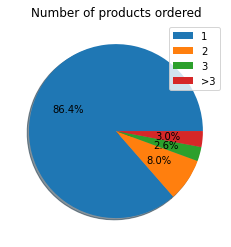

In [ ]:
print(df[['qty_ordered', 'increment_id']].groupby('increment_id').sum().qty_ordered.describe(), '\n')

# df["qty_ordered"].describe()
# len(df[df["qty_ordered"]==1])/len(df)
# len(df["qty_ordered"][df["qty_ordered"]<4])/len(df)

vals=[]
for i in range(1,4):
  vals.append(len(df[df["qty_ordered"]==i]))

a=len(df)-sum(vals)  
vals.append(a) 

plt.pie(vals,labels=None,shadow=True, autopct=lambda x : str(round(x,1)) + "%",
        pctdistance=0.6)
plt.title("Number of products ordered")
plt.legend(["1","2","3",">3"], loc="upper right");

In [18]:
df[df['qty_ordered'] == 1000]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,BIstatus_num,status_new,Customer Since new
239376,507556.0,canceled,6/8/2017,IDROID_BALRX7-Gold,8944.0,1000.0,17888000.0,100323297,Mobiles & Tablets,\N,0.0,jazzwallet,6/8/2017,Gross,"8,944,000",2017.0,6.0,2016-8,6-2017,FY17,5032.0,-1,canceled,201608
239377,507557.0,canceled,6/8/2017,IDROID_BALRX7-Jet black,8944.0,1000.0,17888000.0,100323297,Mobiles & Tablets,\N,0.0,jazzwallet,6/8/2017,Gross,"8,944,000",2017.0,6.0,2016-8,6-2017,FY17,5032.0,-1,canceled,201608
239381,507561.0,canceled,6/8/2017,IDROID_BALRX7-Jet black,8944.0,1000.0,17888000.0,100323300,Mobiles & Tablets,\N,0.0,jazzvoucher,6/8/2017,Gross,"8,944,000",2017.0,6.0,2016-8,6-2017,FY17,5032.0,-1,canceled,201608
239382,507562.0,canceled,6/8/2017,IDROID_BALRX7-Gold,8944.0,1000.0,17888000.0,100323300,Mobiles & Tablets,\N,0.0,jazzvoucher,6/8/2017,Gross,"8,944,000",2017.0,6.0,2016-8,6-2017,FY17,5032.0,-1,canceled,201608
240078,508368.0,complete,6/9/2017,IDROID_BALRX7-Gold,8944.0,1000.0,17888000.0,100323649,Mobiles & Tablets,\N,0.0,jazzvoucher,6/9/2017,Net,"8,944,000",2017.0,6.0,2017-6,6-2017,FY17,50387.0,1,completed,201706
240079,508369.0,complete,6/9/2017,IDROID_BALRX7-Jet black,8944.0,1000.0,17888000.0,100323649,Mobiles & Tablets,\N,0.0,jazzvoucher,6/9/2017,Net,"8,944,000",2017.0,6.0,2017-6,6-2017,FY17,50387.0,1,completed,201706


Observations

*   Price is the unit price;
*   MV = price * qty_ordered;
*   grand_total is the total amount for one purchase (per increment_id);

*   86% of transactions with only 1 product; The average is 1.85;
*   97% of transactions with less than 4 products;
*   Extreme values exist: Transactions with up to 1000 products.

B) price

Text(0.5, 1.0, 'Price boxplot for complete')

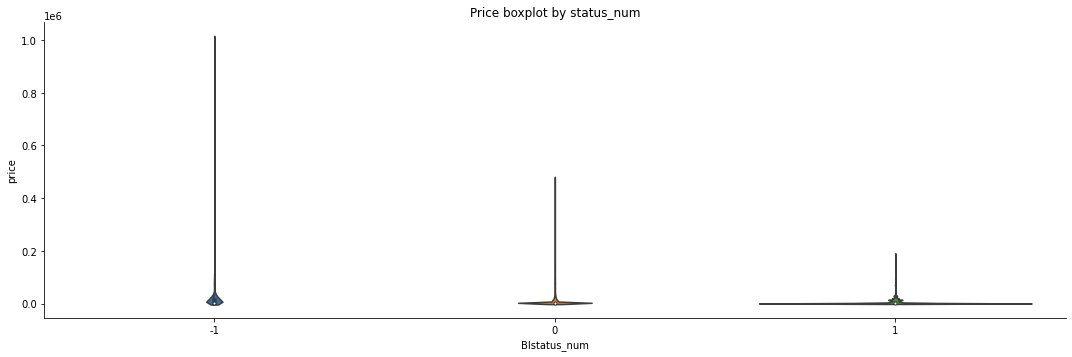

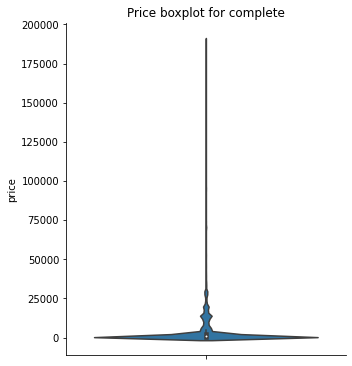

In [ ]:
sns.catplot(x = 'BIstatus_num', y = 'price', kind = 'violin', data = df, height=5, aspect=3);
plt.title("Price boxplot by status_num");

sns.catplot(y = 'price', kind = 'violin', data = test);
plt.title("Price boxplot for complete")

Check status when price = 0: 
 canceled          749
order_refunded    476
complete          369
received          362
refund            164
cod               102
paid                9
\N                  1
Name: status, dtype: int64


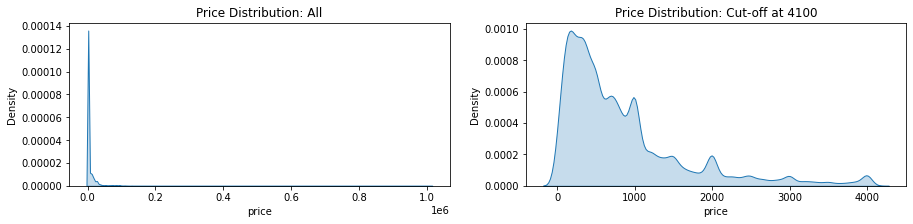

In [ ]:
#Extrem values
print("Check status when price = 0: \n", df["status"][df["price"]==0].value_counts())
# df[(df["price"]==0) & (df["status"]=="completed")].value_counts()
# df[df["price"]>=100000]

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.kdeplot(df["price"],shade=True)
plt.title("Price Distribution: All")
plt.subplot(1,2,2)
sns.kdeplot(df["price"][df["price"]<=4100],shade= True)
plt.title("Price Distribution: Cut-off at 4100");

Observations


*   No negative prices
*   Transactions with price 0 also for completed transaction
*   **TBC: Whether we want to include price = 0 into our model.**
*   Extreme values exist: eg Price 0 or up to 1mn
*   The outliers for items with good status are less wider than items with poor status.
*   Gamma / Tweedie distribution for price.

C) MV

In [19]:
df=df.rename({" MV ":"MV"},axis=1)
df["MV"]=df["MV"].apply(lambda x: x.replace(",",""))
df["MV"]=df["MV"].replace(to_replace=' -   ',value="0")
df["MV"]=df["MV"].astype("int")
len(df[np.round(df["price"]*df["qty_ordered"]-df["MV"],0)!=0])

0

In [20]:
df.MV.describe()

count    5.845120e+05
mean     7.177353e+03
std      3.394767e+04
min      0.000000e+00
25%      3.990000e+02
50%      9.990000e+02
75%      5.000000e+03
max      8.944000e+06
Name: MV, dtype: float64

Observation
*   MV equals price*qty_ordered and has therefore no additional information
*   It has type = object, change it to int type.

D) discount_amount

In [ ]:
# print('Describe (discount_amount):','\n', df["discount_amount"].describe() ,'\n')
print('discount_amount<0 \n', df[df["discount_amount"]<0], '\n')
print('discount_amount>=30000 \n' , df["status"][df["discount_amount"]>=30000].value_counts())

discount_amount<0 
          item_id          status  ... status_new Customer Since new
152474  403716.0        canceled  ...   canceled             201607
152478  403730.0  order_refunded  ...   refunded             201607
152479  403731.0        canceled  ...   canceled             201607

[3 rows x 24 columns] 

discount_amount>=30000 
 canceled          28
complete           7
order_refunded     2
received           1
Name: status, dtype: int64


In [21]:
# Example
df[(df['discount_amount']>0) & (df['increment_id'] == '100562305')]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,BIstatus_num,status_new,Customer Since new
584413,905089.0,order_refunded,8/27/2018,MATBIZ5A702BE6E90AB,96.0,2.0,326.01,100562305,Mobiles & Tablets,NaN,299.99,cod,8/27/2018,Valid,192,2018.0,8.0,2017-11,8-2018,FY19,69407.0,0,refunded,201711
584414,905090.0,order_refunded,8/27/2018,MATMY5A4A253C8A5C2,48.0,2.0,326.01,100562305,Mobiles & Tablets,NaN,299.99,cod,8/27/2018,Valid,96,2018.0,8.0,2017-11,8-2018,FY19,69407.0,0,refunded,201711
584415,905091.0,order_refunded,8/27/2018,MATBIZ5A702C575969E,145.0,1.0,326.01,100562305,Mobiles & Tablets,NaN,299.99,cod,8/27/2018,Valid,145,2018.0,8.0,2017-11,8-2018,FY19,69407.0,0,refunded,201711
584416,905092.0,order_refunded,8/27/2018,MEFEZI5B7169B92D153,275.0,1.0,326.01,100562305,Men's Fashion,NaN,299.99,cod,8/27/2018,Valid,275,2018.0,8.0,2017-11,8-2018,FY19,69407.0,0,refunded,201711
584417,905093.0,order_refunded,8/27/2018,HASQAR5A618CC063535,189.0,1.0,326.01,100562305,Health & Sports,NaN,299.99,cod,8/27/2018,Valid,189,2018.0,8.0,2017-11,8-2018,FY19,69407.0,0,refunded,201711
584418,905094.0,order_refunded,8/27/2018,TAR59EDB892CE7B0,49.0,2.0,326.01,100562305,Superstore,NaN,299.99,cod,8/27/2018,Valid,98,2018.0,8.0,2017-11,8-2018,FY19,69407.0,0,refunded,201711


In [22]:
df[(df['increment_id'] == '100562305')]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,BIstatus_num,status_new,Customer Since new
584413,905089.0,order_refunded,8/27/2018,MATBIZ5A702BE6E90AB,96.0,2.0,326.01,100562305,Mobiles & Tablets,NaN,299.99,cod,8/27/2018,Valid,192,2018.0,8.0,2017-11,8-2018,FY19,69407.0,0,refunded,201711
584414,905090.0,order_refunded,8/27/2018,MATMY5A4A253C8A5C2,48.0,2.0,326.01,100562305,Mobiles & Tablets,NaN,299.99,cod,8/27/2018,Valid,96,2018.0,8.0,2017-11,8-2018,FY19,69407.0,0,refunded,201711
584415,905091.0,order_refunded,8/27/2018,MATBIZ5A702C575969E,145.0,1.0,326.01,100562305,Mobiles & Tablets,NaN,299.99,cod,8/27/2018,Valid,145,2018.0,8.0,2017-11,8-2018,FY19,69407.0,0,refunded,201711
584416,905092.0,order_refunded,8/27/2018,MEFEZI5B7169B92D153,275.0,1.0,326.01,100562305,Men's Fashion,NaN,299.99,cod,8/27/2018,Valid,275,2018.0,8.0,2017-11,8-2018,FY19,69407.0,0,refunded,201711
584417,905093.0,order_refunded,8/27/2018,HASQAR5A618CC063535,189.0,1.0,326.01,100562305,Health & Sports,NaN,299.99,cod,8/27/2018,Valid,189,2018.0,8.0,2017-11,8-2018,FY19,69407.0,0,refunded,201711
584418,905094.0,order_refunded,8/27/2018,TAR59EDB892CE7B0,49.0,2.0,326.01,100562305,Superstore,NaN,299.99,cod,8/27/2018,Valid,98,2018.0,8.0,2017-11,8-2018,FY19,69407.0,0,refunded,201711


In [ ]:
increment = df[['increment_id', 'grand_total', 'discount_amount']].drop_duplicates()
increment.describe()

,grand_total,discount_amount
count,4.546240e+05,454624.000000
mean,8.958855e+03,573.798405
std,5.048235e+04,1569.054600
min,-1.594000e+03,-599.500000
25%,8.490000e+02,0.000000
50%,1.956000e+03,0.000000
75%,9.087675e+03,259.480000
max,1.788800e+07,90300.000000


count    449761.000000
mean          6.996781
std          14.834210
min        -469.410000
25%           0.000000
50%           0.000000
75%          10.000000
max        3287.250000
Name: discount_rate, dtype: float64


Text(0.5, 1.0, 'Discount distribution')

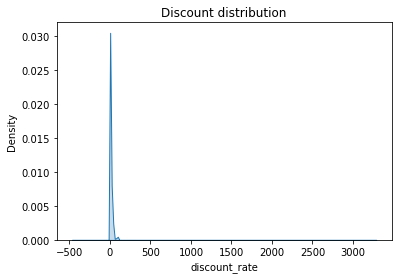

In [ ]:
df['discount_rate'] = (df['discount_amount']/(df['grand_total'] + df['discount_amount']) * 100).round(2)
increment['discount_rate'] = (increment['discount_amount']/(increment['grand_total'] + increment['discount_amount']) * 100).round(2)

print(increment['discount_rate'].describe())
sns.kdeplot(increment['discount_rate'], shade = True, cut = 0);
plt.title("Discount distribution")

In [ ]:
print('Average discount rates by month and year: \n', pd.crosstab(df.Month, df.Year, values=df.discount_rate, aggfunc='mean').round(0), '\n')
print('Average discount rates by month and year for good items e.g. complete: \n',
      pd.crosstab(df[df['BIstatus_num']==1].Month, df[df['BIstatus_num']==1].Year, values=df[df['BIstatus_num']==1].discount_rate, aggfunc='mean').round(0),
      '\n')
print('Average discount rates by month and year for poor items e.g. refunded: \n',
      pd.crosstab(df[df['BIstatus_num']==0].Month, df[df['BIstatus_num']==0].Year, values=df[df['BIstatus_num']==0].discount_rate, aggfunc='mean').round(0))

Average discount rates by month and year: 
 Year   2016.0  2017.0  2018.0
Month                        
1.0       NaN     1.0     7.0
2.0       NaN     1.0    14.0
3.0       NaN     2.0     4.0
4.0       NaN     6.0     4.0
5.0       NaN     8.0     9.0
6.0       NaN     6.0     6.0
7.0       1.0     7.0     2.0
8.0       1.0     7.0     5.0
9.0       7.0     5.0     NaN
10.0      0.0     7.0     NaN
11.0     11.0     7.0     NaN
12.0      0.0     3.0     NaN 

Average discount rates by month and year for good items e.g. complete: 
 Year   2016.0  2017.0  2018.0
Month                        
1.0       NaN     2.0     8.0
2.0       NaN     1.0    14.0
3.0       NaN     2.0     9.0
4.0       NaN    10.0     6.0
5.0       NaN     9.0     8.0
6.0       NaN     7.0    13.0
7.0       2.0     9.0    35.0
8.0       0.0     9.0     0.0
9.0       6.0     7.0     NaN
10.0      0.0     8.0     NaN
11.0     10.0     8.0     NaN
12.0      0.0     4.0     NaN 

Average discount rates by month and yea

In [ ]:
result = smf.ols('BIstatus_num ~ discount_rate', data = df).fit()

table = statsmodels.api.stats.anova_lm(result)

print(table)

                     df         sum_sq    mean_sq           F        PR(>F)
discount_rate       1.0      74.960713  74.960713  100.670174  1.091364e-23
Residual       577664.0  430138.377368   0.744617         NaN           NaN


Observations

*   Only 3 transactions with negative discount. All are related to cancelation or order_refund. Nevertheless price resp. grand_total and discount_amount without clear match;
*   Discounts up to 90k;
*   Very high discounts tend to refer to canceled transactions.

*   Discount is recorded same as grand_total at per increment_id level.
*   Majority of the orders had no discount.
*   The average discount rate was 6.99%.
*   Novermenber had high volumes of sales and high discount rate levels;
*   Anona table showed discount_rate has significant linked with status_num.

E) grand_total

In [ ]:
print(df[(df["grand_total"]<0)].shape)
df[(df["grand_total"]<0)]

(76, 25)


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,BIstatus_num,status_new,Customer Since new,discount_rate
209940,473144.0,complete,5/19/2017,lalassc_SSP-07A,1200.0,1.0,-10.0,100306233,Women's Fashion,\N,300.0000,Payaxis,5/19/2017,Net,1200,2017.0,5.0,2016-11,5-2017,FY17,15714.0,1,completed,201611,103.45
242331,510950.0,received,6/12/2017,SN_Muzadati-500gm,170.0,1.0,-6.4,100324785,Soghaat,\N,74.8095,Easypay,6/12/2017,Valid,170,2017.0,6.0,2016-7,6-2017,FY17,967.0,0,completed,201607,109.36
242332,510951.0,received,6/12/2017,Nimcos_Namak-Paray-200gm,98.0,2.0,-6.4,100324785,Soghaat,\N,86.2510,Easypay,6/12/2017,Valid,196,2017.0,6.0,2016-7,6-2017,FY17,967.0,0,completed,201607,108.01
242333,510952.0,received,6/12/2017,Nimcos_Crunchy-Mix-400gm,216.0,1.0,-6.4,100324785,Soghaat,\N,95.0521,Easypay,6/12/2017,Valid,216,2017.0,6.0,2016-7,6-2017,FY17,967.0,0,completed,201607,107.22
242334,510953.0,received,6/12/2017,RS_Sohan Halwa 1000gm,660.0,1.0,-6.4,100324785,Soghaat,\N,290.4370,Easypay,6/12/2017,Valid,660,2017.0,6.0,2016-7,6-2017,FY17,967.0,0,completed,201607,102.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571270,890219.0,complete,7/27/2018,MEFOXF5B39EF5CC541E-M,420.0,1.0,-340.6,100553654,Men's Fashion,NaN,612.6000,bankalfalah,7/27/2018,Net,420,2018.0,7.0,2016-8,7-2018,FY19,3732.0,1,completed,201608,225.22
571271,890221.0,complete,7/27/2018,VIT5AC4A6E65D6C6,180.0,1.0,-340.6,100553654,Superstore,NaN,612.6000,bankalfalah,7/27/2018,Net,180,2018.0,7.0,2016-8,7-2018,FY19,3732.0,1,completed,201608,225.22
571272,890222.0,complete,7/27/2018,HIJ5B2204D154E0F,450.0,1.0,-340.6,100553654,Superstore,NaN,612.6000,bankalfalah,7/27/2018,Net,450,2018.0,7.0,2016-8,7-2018,FY19,3732.0,1,completed,201608,225.22
571273,890223.0,complete,7/27/2018,HASQAR5A53699375950,98.0,4.0,-340.6,100553654,Health & Sports,NaN,612.6000,bankalfalah,7/27/2018,Net,392,2018.0,7.0,2016-8,7-2018,FY19,3732.0,1,completed,201608,225.22


In [ ]:
df[df['increment_id'] ==100324785]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,BIstatus_num,status_new,Customer Since new,discount_rate
242331,510950.0,received,6/12/2017,SN_Muzadati-500gm,170.0,1.0,-6.4,100324785,Soghaat,\N,74.8095,Easypay,6/12/2017,Valid,170,2017.0,6.0,2016-7,6-2017,FY17,967.0,0,completed,201607,109.36
242332,510951.0,received,6/12/2017,Nimcos_Namak-Paray-200gm,98.0,2.0,-6.4,100324785,Soghaat,\N,86.2510,Easypay,6/12/2017,Valid,196,2017.0,6.0,2016-7,6-2017,FY17,967.0,0,completed,201607,108.01
242333,510952.0,received,6/12/2017,Nimcos_Crunchy-Mix-400gm,216.0,1.0,-6.4,100324785,Soghaat,\N,95.0521,Easypay,6/12/2017,Valid,216,2017.0,6.0,2016-7,6-2017,FY17,967.0,0,completed,201607,107.22
242334,510953.0,received,6/12/2017,RS_Sohan Halwa 1000gm,660.0,1.0,-6.4,100324785,Soghaat,\N,290.4370,Easypay,6/12/2017,Valid,660,2017.0,6.0,2016-7,6-2017,FY17,967.0,0,completed,201607,102.25
242335,510954.0,received,6/12/2017,e-seller_7,66.0,1.0,-6.4,100324785,Mobiles & Tablets,\N,29.0437,Easypay,6/12/2017,Valid,66,2017.0,6.0,2016-7,6-2017,FY17,967.0,0,completed,201607,128.26
242336,510955.0,received,6/12/2017,SN_rabiya100gm,90.0,1.0,-6.4,100324785,Soghaat,\N,39.6050,Easypay,6/12/2017,Valid,90,2017.0,6.0,2016-7,6-2017,FY17,967.0,0,completed,201607,119.27
242337,510956.0,received,6/12/2017,LS_188552000157,5.0,3.0,-6.4,100324785,Superstore,\N,6.6008,Easypay,6/12/2017,Valid,15,2017.0,6.0,2016-7,6-2017,FY17,967.0,0,completed,201607,3287.25
242338,510957.0,received,6/12/2017,LS_8961003040214,5.0,3.0,-6.4,100324785,Superstore,\N,6.6008,Easypay,6/12/2017,Valid,15,2017.0,6.0,2016-7,6-2017,FY17,967.0,0,completed,201607,3287.25


In [ ]:
df[df["grand_total"]==0].shape

(9632, 25)

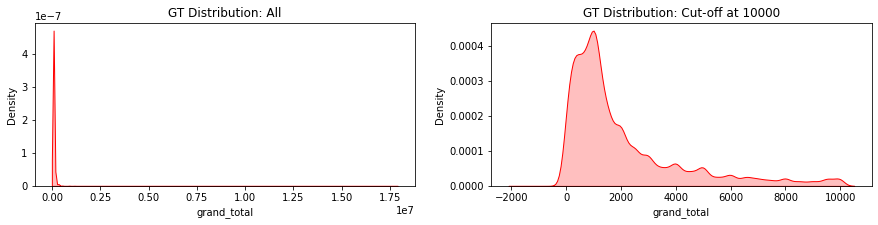

In [ ]:
#Extrem values, Outliers
# df[df["grand_total"]<0]
# df[df["grand_total"]==0]

#Calculation approach: 
# gt_cal=df["price"]*df["qty_ordered"]-df["discount_amount"]
# len(df[gt_cal==df["grand_total"]])

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.kdeplot(increment["grand_total"],shade=True,color="red")
plt.title("GT Distribution: All")
plt.subplot(1,2,2)
sns.kdeplot(increment["grand_total"][increment["grand_total"]<=10000],shade= True,color="red")
plt.title("GT Distribution: Cut-off at 10000");

In [ ]:
df['grand_item'] = (df['MV']*(1-df['discount_rate']/100)).round(2)
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,BIstatus_num,status_new,Customer Since new,discount_rate,grand_item
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,-1,canceled,201607,0.00,240.00
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,2450,2016.0,7.0,2016-7,7-2016,FY17,3.0,-1,canceled,201607,0.00,2450.00
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,1,completed,201607,83.33,60.01
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,1110,2016.0,7.0,2016-7,7-2016,FY17,5.0,0,refunded,201607,0.00,1110.00
5,211137.0,canceled,7/1/2016,UK_Namkino All In One 200 Gms,80.0,1.0,80.0,100147448,Soghaat,\N,0.0,cod,7/1/2016,Gross,80,2016.0,7.0,2016-7,7-2016,FY17,6.0,-1,canceled,201607,0.00,80.00


Observations

*   76 negative values exist and also correspond to status "complete" and not only eg "canceled" or "refund"
*   **increment_id = 100324785, the discount amounts are different per item in one order. This data is different recorded compared to others. How to figure out all this scenarios? **
*   Nearly 10k observations with amount 0 without clear reason considering price, qty_ordered, discount_amount or status
*   Extreme values exist and need further investigation to decide about exclusion or discretization
*   **Create a new variable 'grand_item' to calculate the actual price after discount per item. ** 

**8 category_name_1**

In [ ]:
!pip install squarify
import squarify

test= pd.DataFrame(df["category_name_1"].value_counts())
test=test.reset_index()
test

,index,category_name_1
0,Mobiles & Tablets,115710
1,Men's Fashion,92219
2,Women's Fashion,59719
3,Appliances,52413
4,Superstore,43613
5,Beauty & Grooming,41494
6,Soghaat,34011
7,Others,29212
8,Home & Living,26504
9,Entertainment,26326


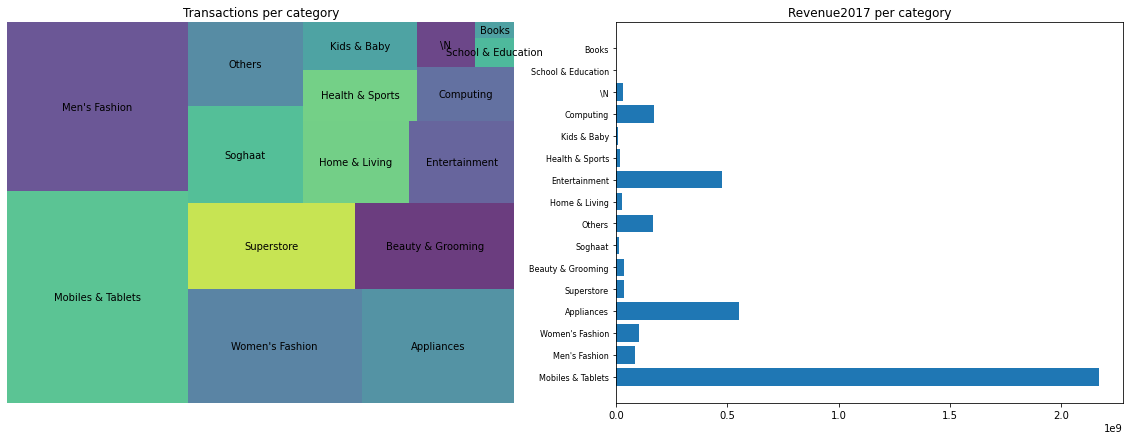

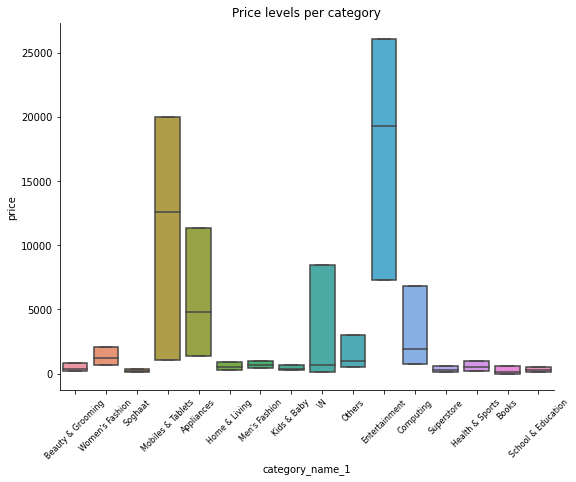

In [ ]:
rev2017=[]
for name in test["index"]:
  rev2017.append(df["grand_item"][df["category_name_1"]==name].sum())


plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
squarify.plot(sizes=test["category_name_1"], label=test["index"], alpha=0.8 )
plt.axis('off')
plt.title("Transactions per category")

plt.subplot(1,2,2)
plt.barh(range(len(rev2017)),rev2017)
plt.yticks(range(len(rev2017)),df["category_name_1"].value_counts().index,fontsize=8)
plt.title("Revenue2017 per category")

g=sns.catplot(x="category_name_1",y='price',  kind= 'box',data= df,showfliers=False,whis=0)
g.fig.set_figheight(6)
g.fig.set_figwidth(10)
plt.xticks(fontsize=8,rotation=45)
plt.title("Price levels per category");

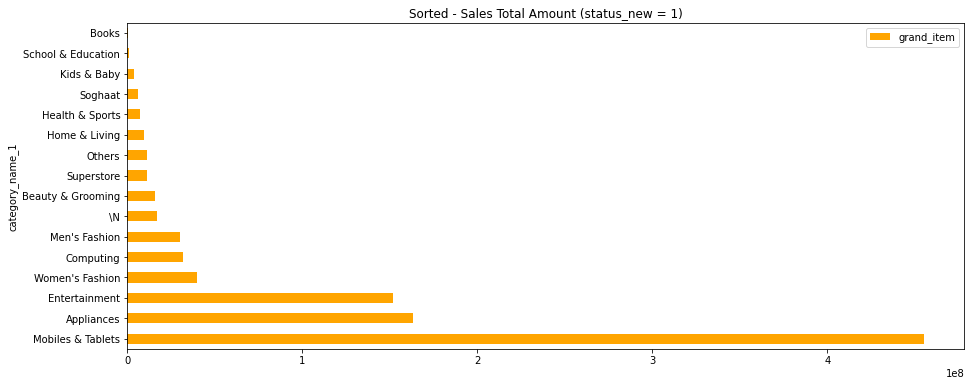

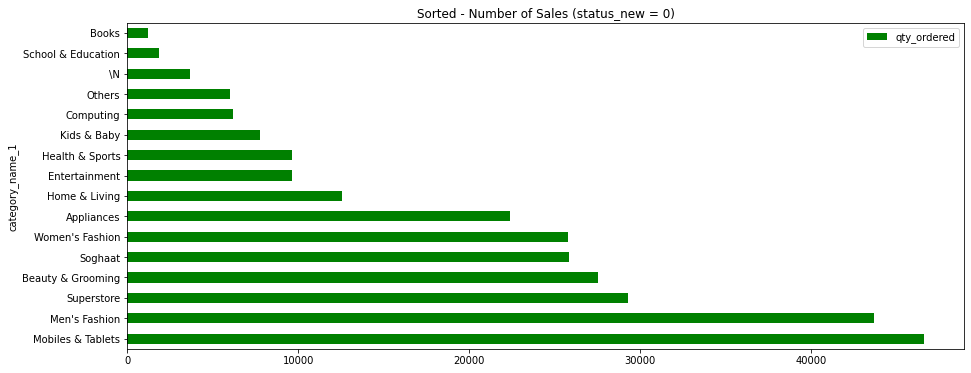

In [ ]:
df.loc[(df['BIstatus_num']==1), ['grand_item', 'category_name_1']].groupby('category_name_1').sum().sort_values(by=['grand_item'], ascending = False).plot(kind='barh',color='orange',figsize=(15,6))
plt.title('Sorted - Sales Total Amount (status_new = 1)');
df.loc[(df['BIstatus_num']==1), ['qty_ordered', 'category_name_1']].groupby('category_name_1').sum().sort_values(by=['qty_ordered'], ascending = False).plot(kind='barh',color='green',figsize=(15,6))
plt.title('Sorted - Number of Sales (status_new = 0)');

In [ ]:
df.category_name_1.fillna('\\N',inplace=True)

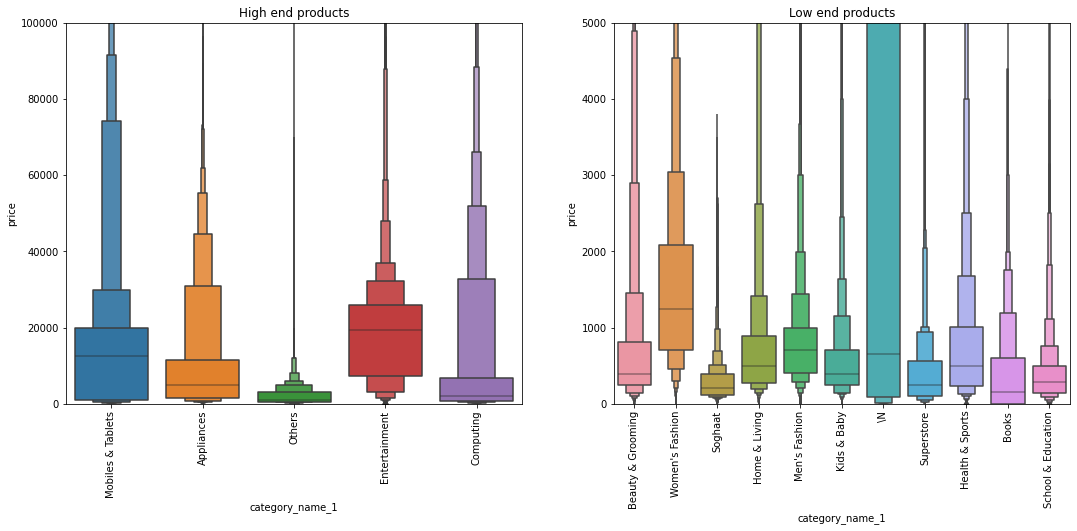

In [ ]:
# Price distribution of high & low end products

HighEnd = ['Mobiles & Tablets','Appliances','Entertainment','Computing','Others']
data3a=df[['category_name_1','price']][df.category_name_1.isin(HighEnd)]
data3b=df[['category_name_1','price']][~df.category_name_1.isin(HighEnd)]

fig, axs = plt.subplots(1,2,figsize=(18,7))
ax1=sns.boxenplot('category_name_1','price',data=data3a,ax=axs[0])
ax1.tick_params(axis='x', rotation=90)
ax1.set(title='High end products',ylabel='price', ylim=(0,100000))

ax2=sns.boxenplot('category_name_1','price',data=data3b,ax=axs[1])
ax2.tick_params(axis='x', rotation=90)
ax2.set(title='Low end products',ylabel='price', ylim=(0,5000));

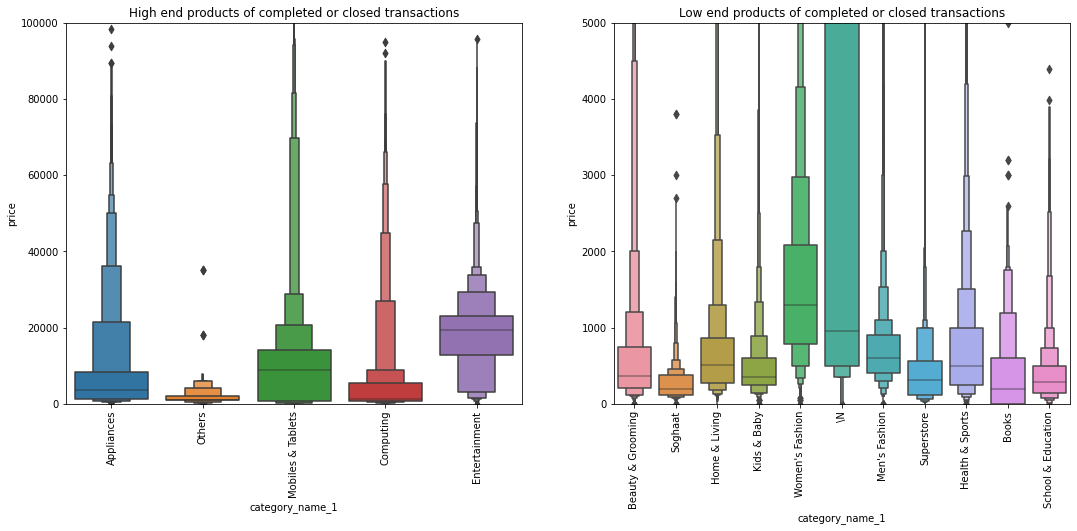

In [ ]:
# Different approach Visualize the same graphs, but only with transactions which are completed or closed, maybe we can see here a different price distribution
df_net = df[df['BI Status'] == 'Net']
HighEnd = ['Mobiles & Tablets','Appliances','Entertainment','Computing','Others']
data3a=df_net[['category_name_1','price']][df.category_name_1.isin(HighEnd)]
data3b=df_net[['category_name_1','price']][~df.category_name_1.isin(HighEnd)]

fig, axs = plt.subplots(1,2,figsize=(18,7))
ax1=sns.boxenplot('category_name_1','price',data=data3a,ax=axs[0])
ax1.tick_params(axis='x', rotation=90)
ax1.set(title='High end products of completed or closed transactions',ylabel='price', ylim=(0,100000))

ax2=sns.boxenplot('category_name_1','price',data=data3b,ax=axs[1])
ax2.tick_params(axis='x', rotation=90)
ax2.set(title='Low end products of completed or closed transactions',ylabel='price', ylim=(0,5000));

Observations
*  16 Categories including one unspecified category labeled \N   
*  Top Selling categories by revenues ('grand_item'): Mobiles&Tablets, Men's Fashion, Entertainment followed by Women's Fashion
*  Top selling categories by volumes ('qty_ordered'): Men's Fashion, Mobiles & Tablets, Superstore followed by Women's Fashion.
* Although mobile & tablets category ranked the second in sales volume, its total revenue was significantly high than all other categories.
*  The because Mobiles&Tablets had relative high price. Entertainment had highest price, although volumes of sales was relatively low.

*  Highest Revenue 2017: Mobiles&Tablets, Appliances followed by Entertainment
*  Highest average price levels (quantile view): Entertainment followed by Mobile &Tablets and Appliances 

*  Missing values default to '\\N'.






**9 sales_commission_code**


In [ ]:
df["sales_commission_code"].value_counts()

\N                 339000
40968                2710
C-LHW-50074          2434
C-RWP-31924          1720
cisb30211            1613
                    ...  
57423                   1
Zee123                  1
GRS - 3074479-1         1
C-GUJ-45642             1
C-RWP-41684             1
Name: sales_commission_code, Length: 7226, dtype: int64

Observations
*   Significant amount of missing values in 2018 (see above)
*   Most rows are unspecified
*   To be dropped.



**10 payment_method**

In [ ]:
print(df["payment_method"].value_counts(normalize=True))

df[df["payment_method"]=="cod"].head(10)

cod                  0.465267
Payaxis              0.167045
Easypay              0.141821
jazzwallet           0.060127
easypay_voucher      0.053337
bankalfalah          0.039460
jazzvoucher          0.026745
Easypay_MA           0.023998
customercredit       0.012925
apg                  0.003008
ublcreditcard        0.001509
cashatdoorstep       0.001252
mcblite              0.001237
mygateway            0.001145
internetbanking      0.000808
productcredit        0.000214
marketingexpense     0.000077
financesettlement    0.000026
Name: payment_method, dtype: float64


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,BIstatus_num,status_new,Customer Since new,discount_rate,grand_item
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,-1,canceled,201607,0.00,240.00
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,2450,2016.0,7.0,2016-7,7-2016,FY17,3.0,-1,canceled,201607,0.00,2450.00
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,1,completed,201607,83.33,60.01
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,1110,2016.0,7.0,2016-7,7-2016,FY17,5.0,0,refunded,201607,0.00,1110.00
5,211137.0,canceled,7/1/2016,UK_Namkino All In One 200 Gms,80.0,1.0,80.0,100147448,Soghaat,\N,0.0,cod,7/1/2016,Gross,80,2016.0,7.0,2016-7,7-2016,FY17,6.0,-1,canceled,201607,0.00,80.00
6,211138.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147449,Beauty & Grooming,\N,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,7.0,1,completed,201607,83.33,60.01
7,211139.0,complete,7/1/2016,UK_Namkino Mix Nimco 400 Gms,170.0,1.0,170.0,100147450,Soghaat,\N,0.0,cod,7/1/2016,Net,170,2016.0,7.0,2016-7,7-2016,FY17,6.0,1,completed,201607,0.00,170.00
10,211142.0,complete,7/1/2016,"GFC_Pedestal Myga Cross Base (Special Guard) 24""",5500.0,1.0,5500.0,100147453,Appliances,\N,0.0,cod,7/1/2016,Net,5500,2016.0,7.0,2016-7,7-2016,FY17,9.0,1,completed,201607,0.00,5500.00
11,211143.0,received,7/1/2016,BK1070200PL,210.0,1.0,366.0,100147454,Soghaat,\N,0.0,cod,7/1/2016,Valid,210,2016.0,7.0,2016-7,7-2016,FY17,10.0,0,completed,201607,0.00,210.00
12,211144.0,received,7/1/2016,BK1130200CF,156.0,1.0,366.0,100147454,Soghaat,\N,0.0,cod,7/1/2016,Valid,156,2016.0,7.0,2016-7,7-2016,FY17,10.0,0,completed,201607,0.00,156.00


In [ ]:
df['payment_method'].replace(['Easypay_MA','easypay_voucher'],'Easypay',inplace=True)
df['payment_method'].replace(['jazzwallet','jazzvoucher'],'Jazz',inplace=True)
df['payment_method'].replace(['customercredit','ublcreditcard'],'Credit',inplace=True)
df['payment_method'].replace(['internetbanking'],'bankalfalah',inplace=True)

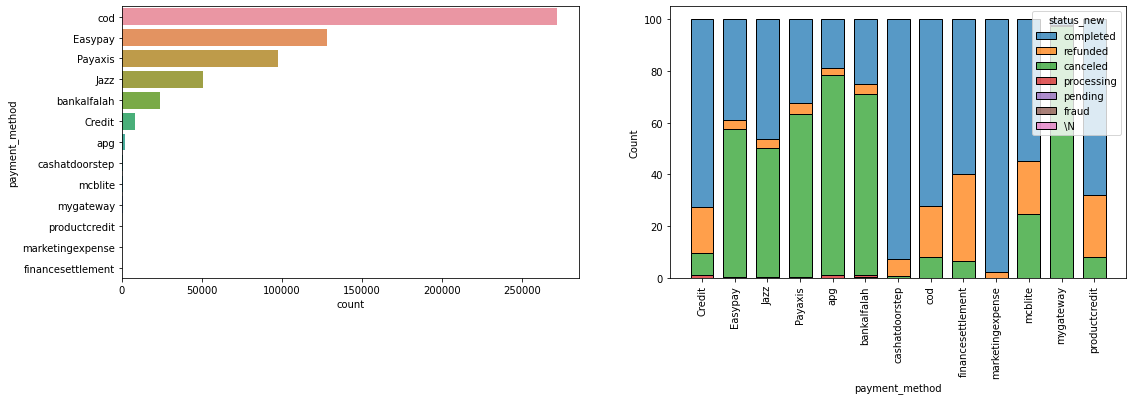

In [ ]:
data4a=df.groupby("payment_method").count().sort_values('qty_ordered',ascending=False).reset_index()
data4b=df.groupby('payment_method')["status_new"].value_counts(normalize=True).mul(100).reset_index(name='percentage')

fig, axs = plt.subplots(1,2,figsize=(18,5))
ax1=sns.barplot('qty_ordered','payment_method',data=data4a,ax=axs[0])
ax1.set(xlabel="count")

ax2=sns.histplot(x='payment_method',hue='status_new',weights= 'percentage', multiple = 'stack',data=data4b,shrink = 0.7,ax=axs[1])
ax2.tick_params(axis='x', rotation=90);


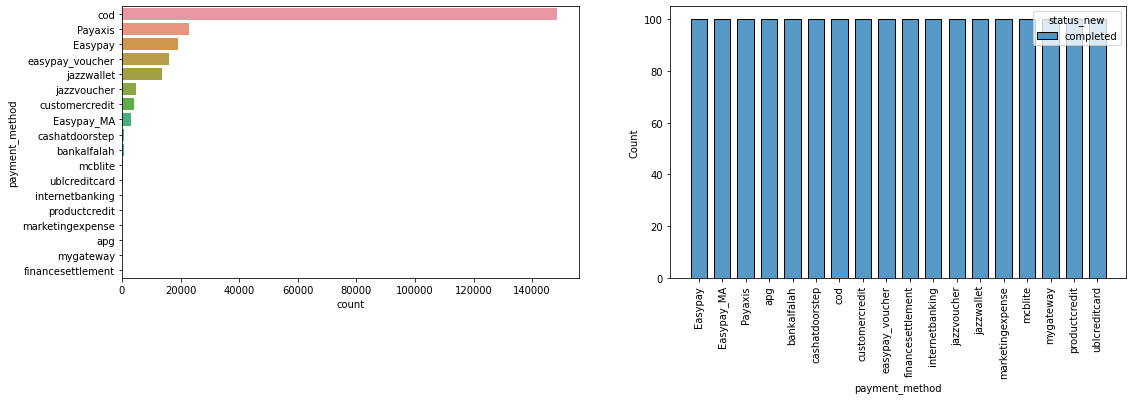

In [ ]:
# Different approach Visualize the same graphs, but only with transactions which are completed or closed, maybe we can observe here a different trend
data4a=df_net.groupby("payment_method").count().sort_values('qty_ordered',ascending=False).reset_index()
data4b=df_net.groupby('payment_method')["status_new"].value_counts(normalize=True).mul(100).reset_index(name='percentage')

fig, axs = plt.subplots(1,2,figsize=(18,5))
ax1=sns.barplot('qty_ordered','payment_method',data=data4a,ax=axs[0])
ax1.set(xlabel="count")

ax2=sns.histplot(x='payment_method',hue='status_new',weights= 'percentage', multiple = 'stack',data=data4b,shrink = 0.7,ax=axs[1])
ax2.tick_params(axis='x', rotation=90);

Observations
*   47% of transactions with payment method "cod"
*   Cash on delivery (cod) is the most popular payment method, followed by 'Payaxis' and 'Easypay'
*   However, 60% of the 'Payaxis' & 'Easypay' transactions were canceled
*   90%+ completed transactions for payment methods such as 'cashdoorstep' & 'marketingexpense', but they were small volume
*   most of 'mygateway' transactions were canceled, though small volume but not reliable payment method

*   Cash on delivery (cod) is still the most popular payment method, followed by 'Easypay' and 'Payaxis'
*   Bankalfalah seems is the first step relevant, but most of the transactions were cancelt

*   Levels grouped into fewer categories.

**11 Year**

In [ ]:
test=df["created_at"].apply(lambda l: l[-4:])
test=test.astype("int")
(test-df["Year"]).sum()

0.0

Observations
*   Year corresponds to year in "created_at". Therefore no additional information






**12 Month**

In [ ]:
month=month.astype("int")
(month-df["Month"]).sum()

0.0

In [ ]:
df.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', 'MV', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'BIstatus_num', 'status_new',
       'Customer Since new', 'discount_rate', 'grand_item'],
      dtype='object')

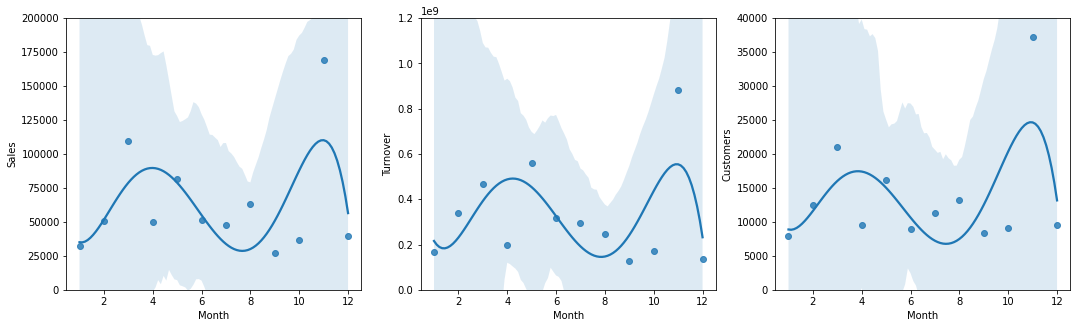

In [ ]:
data1a=df.groupby("Month").sum().reset_index()
data1b=df.groupby("Month").nunique().reset_index()

fig, axs = plt.subplots(1,3, figsize=(18,5))
ax1=sns.regplot(x="Month", y="qty_ordered", data=data1a,order=5,ax=axs[0])
ax1.set(ylabel="Sales",ylim=(0,200000))

ax2=sns.regplot(x="Month", y="grand_item", data=data1a,order=5,ax=axs[1])
ax2.set(ylabel="Turnover",ylim=(0,1200000000))

ax3=sns.regplot(x="Month", y="Customer ID", data=data1b,order=5,ax=axs[2])
ax3.set(ylabel="Customers",ylim=(0,40000));

Visualize the same graphs, but only with transactions which are completed or closed, maybe we can see here an different trend

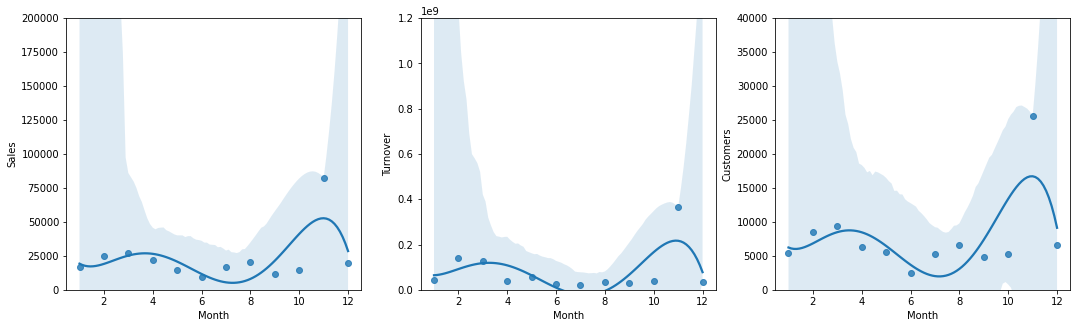

In [ ]:
data1a=df[df['BI Status'] =='Net'].groupby("Month").sum().reset_index()
data1b=df[df['BI Status'] =='Net'].groupby("Month").nunique().reset_index()

fig, axs = plt.subplots(1,3, figsize=(18,5))
ax1=sns.regplot(x="Month", y="qty_ordered", data=data1a,order=5,ax=axs[0])
ax1.set(ylabel="Sales",ylim=(0,200000))

ax2=sns.regplot(x="Month", y="grand_item", data=data1a,order=5,ax=axs[1])
ax2.set(ylabel="Turnover",ylim=(0,1200000000))

ax3=sns.regplot(x="Month", y="Customer ID", data=data1b,order=5,ax=axs[2])
ax3.set(ylabel="Customers",ylim=(0,40000));

Observations
* Month corresponds to month in "created_at". 
* Same pattern for sales, turnover and customers, where the value is highest towards financial year end and end of the year
* Similar pattern for sales, turnover and customers as above but we can also see, that the peak in April is lower than before.So most transcation happens at the end of the year




**13 M-Y**

In [ ]:
test=df
test["Month"]=test["Month"].astype("str")
test["Month"]=test["Month"].apply(lambda k: k[:-2])
test["Year"]=test["Year"].astype("str")
test["Year"]=test["Year"].apply(lambda k: k[0:4])
test["neu"]=test["Month"]+"-"+test["Year"]
len(test[test["neu"]!=test["M-Y"]])

0

Observations
*   No additional information in variable included;
*   To be dropped as can be replaced by 'Customer Since new'




**14 FY**

In [ ]:
df.FY.value_counts()

FY18    306872
FY17    254705
FY19     22935
Name: FY, dtype: int64

In [ ]:
df["Month"]=df["Month"].astype("float64")
df["Year"]=df["Year"].astype("float64")
df["FY"][(df["Month"]>=7) & (df["Year"]==2016)].value_counts()
df["FY"][(df["Month"]<7) & (df["Year"]==2017)].value_counts()

df["FY"][(df["Month"]>=7) & (df["Year"]==2017)].value_counts()
df["FY"][(df["Month"]<7) & (df["Year"]==2018)].value_counts()

df["FY"][(df["Month"]>=7) & (df["Year"]==2018)].value_counts()
df["FY"][(df["Month"]>=7) & (df["Year"]==2018)].value_counts()

FY19    22935
Name: FY, dtype: int64

Observations
*   Considering year from July to June
*   No additional information



## Data Cleaning

In [ ]:
print(df.columns, '\n')
print(df.shape, '\n')
print(df.isnull().sum())

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', 'MV', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'BIstatus_num', 'status_new',
       'Customer Since new', 'discount_rate', 'grand_item', 'neu'],
      dtype='object') 

(584512, 27) 

item_id                       0
status                        0
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1               0
sales_commission_code    137164
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
MV                            0
Year                          0
Month                         0
Customer

### 1. drop redundant rows & columns

In [ ]:
df2 = df.drop(['item_id', 'sku','sales_commission_code', 'M-Y', 'FY', 'increment_id', 'Customer ID',
               'status', 'created_at', 'neu', 'Customer Since', 'Customer Since new'], axis=1)
df2 = df2.loc[df2['BIstatus_num'] != -1]
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383063 entries, 3 to 584519
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   price            383063 non-null  float64
 1   qty_ordered      383063 non-null  float64
 2   grand_total      383063 non-null  float64
 3   category_name_1  383063 non-null  object 
 4   discount_amount  383063 non-null  float64
 5   payment_method   383063 non-null  object 
 6   Working Date     383063 non-null  object 
 7   BI Status        383063 non-null  object 
 8   MV               383063 non-null  int64  
 9   Year             383063 non-null  float64
 10  Month            383063 non-null  float64
 11  BIstatus_num     383063 non-null  int64  
 12  status_new       383063 non-null  object 
 13  discount_rate    376335 non-null  float64
 14  grand_item       376335 non-null  float64
dtypes: float64(8), int64(2), object(5)
memory usage: 46.8+ MB
None


### 2. rename & rearrange columns

In [ ]:
df2.rename({'qty_ordered':'qty', 'grand_total':'total',
            'category_name_1':'category','discount_amount':'discount'},axis=1,inplace=True) 
df2=df2[['price', 'qty', 'discount', 'total', 'category', 
       'payment_method', 'BI Status', 'Year', 'Month']]

**To be discussed in group which columns to use.**